<a href="https://colab.research.google.com/github/aksalas/Prediction-of-Product-Sales/blob/main/Copy_of_Prediction_of_Product_Sales_(7_13).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales

- Author: Arvin Kenneth Salas

## Project Overview

In [2]:
# Libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


## "Load and Inspect Data"

In [3]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv')

Mounted at /content/drive


In [4]:
# Load Data

df = pd.read_csv('/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv')

In [5]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


1) How many rows and columns?

2) What are the datatypes of each variable?

3) Are there duplicates? If so, drop any duplicates.

4) Identify missing values.

5) Address the missing values by using a placeholder value.

6) Confirm that there are no missing values after addressing them.

7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).

8) For any numerical columns, obtain the summary statistics of each (min, max, mean).

## "Clean Data"


In [6]:
# How many rows and columns

df.shape

(8523, 12)

In [7]:
# What are the datatypes of each variable

df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [8]:
# Are there duplicates? If so, drop any duplicates

df.duplicated().sum()

0

**Identify missing values.**



In [9]:
# Identify missing values
df.isna()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,True,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
print(df.isna().sum()/len(df)*100)

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64


**Address the missing values by using a placeholder value.**



In [11]:
# Address the missing values by using a placeholder value

numeric_placeholder = -1
categorical_placeholder = 'Missing'
df['Item_Weight'].fillna(value = numeric_placeholder, inplace = True)
df['Outlet_Size'].fillna(value = categorical_placeholder, inplace = True)

6) Confirm that there are no missing values after addressing them.




In [12]:
# Confirm that there are no missing values after addressing them

df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).



In [13]:
# Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).


Cat_list = df.select_dtypes('object').columns
Cat_list
for Cat in Cat_list:
  print(f"Value Counts for {Cat}")
  print(df[Cat].value_counts())
  print('\n')

Value Counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value Counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value Counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value Counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930


In [14]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('LF','Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('low fat','Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('reg','Regular')

df["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [15]:
# 8) For any numerical columns, obtain the summary statistics of each (min, max, mean).
Num_list = df.select_dtypes('number').columns
df.describe(include="number")

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.478936,0.066132,140.992782,1997.831867,2181.288914
std,6.720742,0.051598,62.275067,8.371760,1706.499616
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## "Exploratory Data Analysis"


For Part 3, your task is to create exploratory visuals that might help you understand, explain, or model your data. This must include at least one of each:

- Histograms to view the distributions of numerical features in your dataset.
- Boxplots to view statistical summaries of numerical features in your dataset.
- Countplots to view the frequency of each class of categorial features in your dataset.
- Heatmap to view the correlation between features.
- Start updating the README file associated with the project.

Add text describing the project.
Select two key visuals of different types that demonstrate a relevant insight into the data. Add text with a brief (1 sentence is sufficient) interpretation of the visuals you include.

#- Determining numerical and categorical columns

In [16]:
# Categorical columns

cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [46]:
# Numerical columns

num_cols = df.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

# Item types

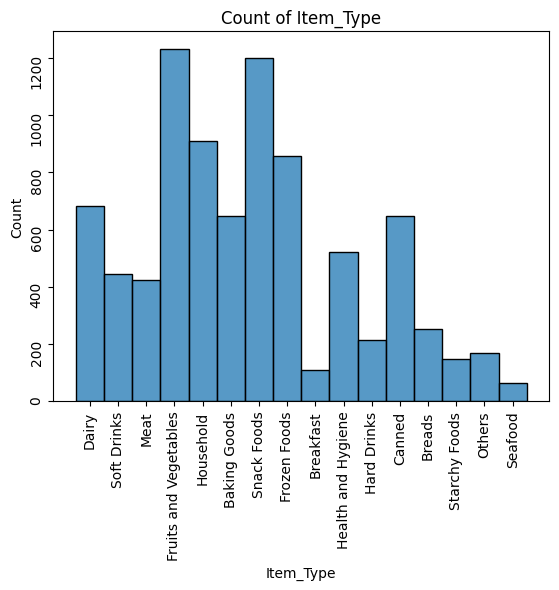

In [18]:

ax = sns.histplot(data=df,
                   x='Item_Type')

ax.set_title('Count of Item_Type');

ax.tick_params(rotation = 90)


# Item Visibility

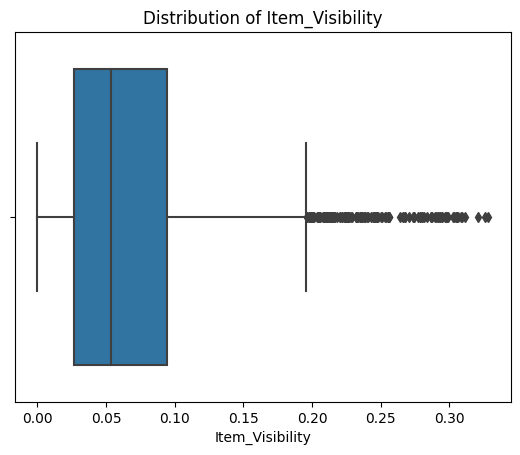

In [25]:
ax = sns.boxplot(data=df,
                 x='Item_Visibility')

ax.set_title('Distribution of Item_Visibility');


# Item Outlet Sales

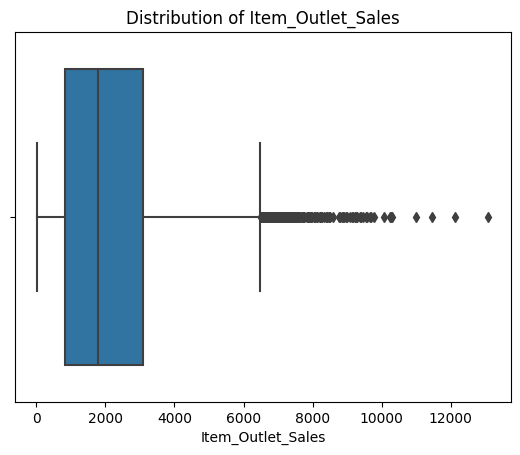

In [29]:
ax = sns.boxplot(data=df,
                 x='Item_Outlet_Sales')

ax.set_title('Distribution of Item_Outlet_Sales');

# Item Types

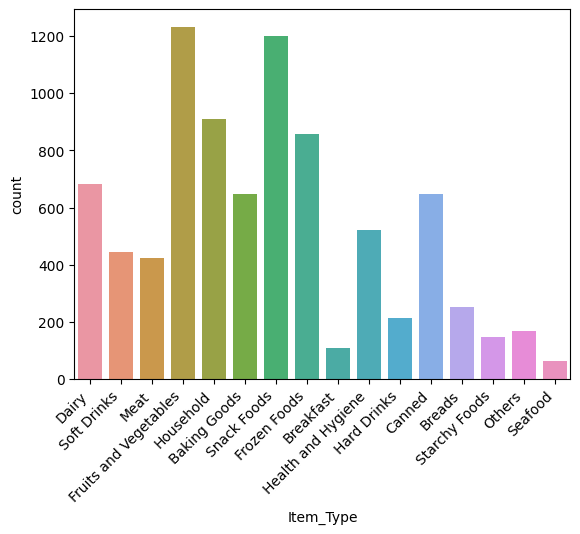

In [41]:
ax = sns.countplot(data=df, x="Item_Type")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

ax.set_title('Count of Item_Type');


# Outlet Types

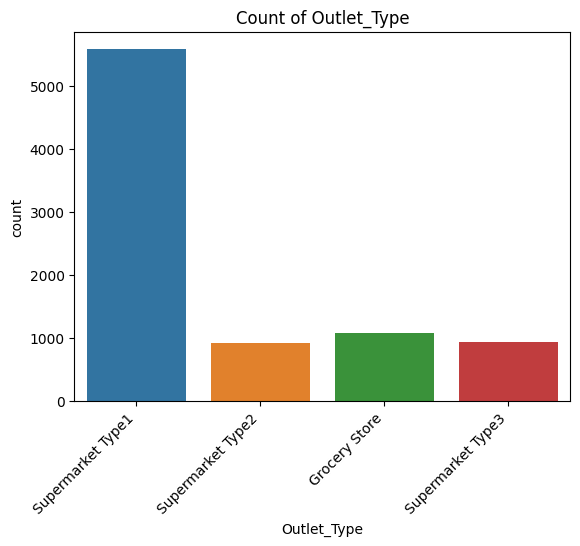

In [47]:
ax = sns.countplot(data=df, x="Outlet_Type")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

ax.set_title('Count of Outlet_Type');


# Heatmap

In [31]:
corr = df.corr()
corr

<ipython-input-31-4381f08f6434>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.079371,0.022367,0.537341,-0.055461
Item_Visibility,-0.079371,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.022367,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,0.537341,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,-0.055461,-0.128625,0.567574,-0.049135,1.000000


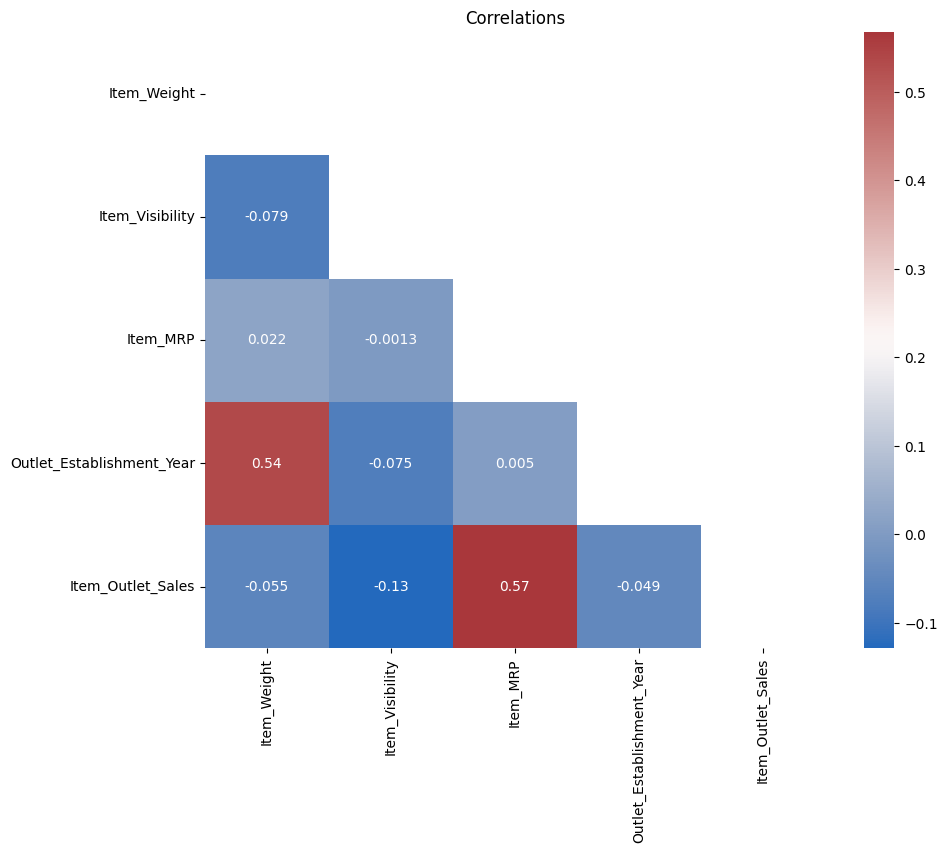

In [48]:
mask = np.triu(np.ones_like(corr))
fig, ax = plt.subplots(figsize = (10, 8))
sns.heatmap(corr, cmap= 'vlag', annot = True, mask = mask);

ax.set_title('Correlations');


## "Feature Inspection"
